In [1]:
from numpy import pi as PI
from scipy.integrate import quad
from scipy.spatial.distance import pdist, cdist

import scipy
import random
import numpy as np
import ringity as rng
import networkx as nx
import matplotlib.pyplot as plt

### Sample distribution

In [2]:
kapp = 1.134
lamb = 1/kapp
beta = 2/np.pi * np.arctan(1/lamb)

In [3]:
N = 2**12
positions = rng.get_positions(N, beta=beta)

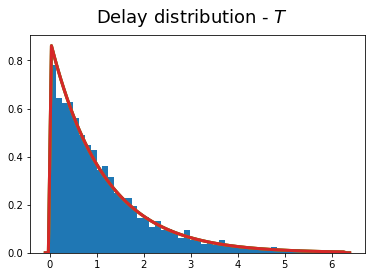

In [4]:
x = np.linspace(-0.1,2*np.pi+0.1,100)

plt.hist(positions, density=True, bins=50);

plt.plot(x, rng.pdf_delay(x, lamb, 'rate') , linewidth=3)
plt.plot(x, rng.pdf_delay(x, kapp, 'shape'), linewidth=3)
plt.plot(x, rng.pdf_delay(x, beta, 'delay'), linewidth=3)

plt.suptitle("Delay distribution - $T$", fontsize=18);

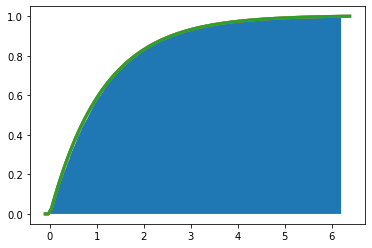

In [5]:
cdf_x = np.sort(positions)
cdf_y = np.arange(len(positions))/len(positions)

plt.fill_between(cdf_x, cdf_y, linewidth=3)
plt.plot(x, rng.cdf_delay(x, lamb, 'rate' ), linewidth=3)
plt.plot(x, rng.cdf_delay(x, kapp, 'shape'), linewidth=3)
plt.plot(x, rng.cdf_delay(x, beta, 'delay'), linewidth=3)

### Absolute distance

In [6]:
abs_dists = pdist(positions.reshape(-1,1))

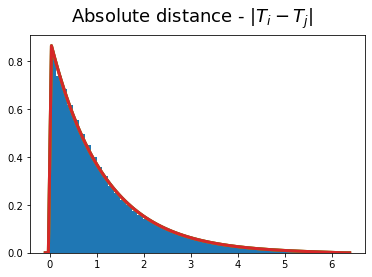

In [7]:
x = np.linspace(-0.1,2*np.pi+0.1,100)

plt.hist(abs_dists, density=True, bins=50);

plt.plot(x, rng.pdf_absolute_distance(x, lamb, 'rate') , linewidth=3)
plt.plot(x, rng.pdf_absolute_distance(x, kapp, 'shape'), linewidth=3)
plt.plot(x, rng.pdf_absolute_distance(x, beta, 'delay'), linewidth=3)

plt.suptitle("Absolute distance - $|T_i - T_j|$", fontsize=18);

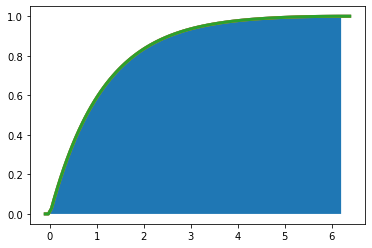

In [8]:
cdf_x = np.sort(abs_dists)
cdf_y = np.arange(len(abs_dists))/len(abs_dists)

plt.fill_between(cdf_x, cdf_y, linewidth=3)
plt.plot(x, rng.cdf_absolute_distance(x, lamb, 'rate' ), linewidth=3)
plt.plot(x, rng.cdf_absolute_distance(x, kapp, 'shape'), linewidth=3)
plt.plot(x, rng.cdf_absolute_distance(x, beta, 'delay'), linewidth=3)

### Circular distance

In [9]:
circ_dists = rng.circular_distances(positions)

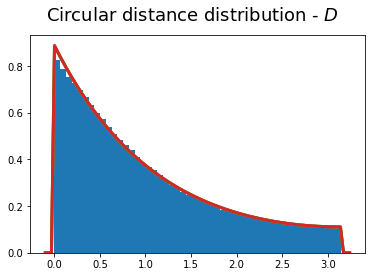

In [10]:
x = np.linspace(-0.1,np.pi+0.1,100)

plt.hist(circ_dists, density=True, bins=50);

plt.plot(x, rng.pdf_circular_distance(x, lamb, 'rate') , linewidth=3)
plt.plot(x, rng.pdf_circular_distance(x, kapp, 'shape'), linewidth=3)
plt.plot(x, rng.pdf_circular_distance(x, beta, 'delay'), linewidth=3)

plt.suptitle("Circular distance distribution - $D$", fontsize=18);

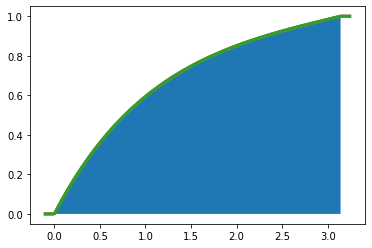

In [11]:
cdf_x = np.sort(circ_dists)
cdf_y = np.arange(len(circ_dists))/len(circ_dists)

plt.fill_between(cdf_x, cdf_y, linewidth=3)
plt.plot(x, rng.cdf_circular_distance(x, lamb, 'rate' ), linewidth=3)
plt.plot(x, rng.cdf_circular_distance(x, kapp, 'shape'), linewidth=3)
plt.plot(x, rng.cdf_circular_distance(x, beta, 'delay'), linewidth=3)

### Similarity

In [12]:
a = 0.34

simis = rng.overlap(circ_dists,a)/(2*np.pi*a)

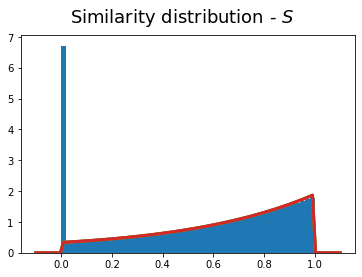

In [13]:
x = np.linspace(-0.1,1+0.1,100)

plt.hist(simis, density=True, bins=50);

plt.plot(x, rng.pdf_similarity(x, lamb, a, 'rate') , linewidth=3)
plt.plot(x, rng.pdf_similarity(x, kapp, a, 'shape'), linewidth=3)
plt.plot(x, rng.pdf_similarity(x, beta, a, 'delay'), linewidth=3)

plt.suptitle("Similarity distribution - $S$", fontsize=18);

In [14]:
print(np.mean(simis))

0.558866021806828


In [15]:
print(rng.mean_similarity(lamb, a, 'rate'))
print(rng.mean_similarity(kapp, a, 'shape'))
print(rng.mean_similarity(beta, a, 'delay'))

0.5597516436310737
0.5597516436310737
0.5597516436310739


### Probability

In [16]:
rho = 0.1
mu_S = rng.mean_similarity(lamb, a)

assert rho <= mu_S

k = rho/mu_S

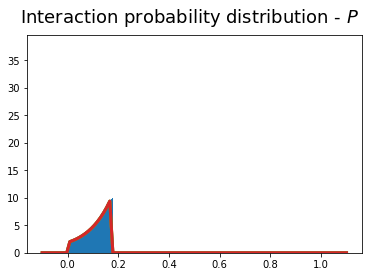

In [40]:
x = np.linspace(-0.1,1+0.1,100)

plt.hist(k*simis, density=True, bins=50);

plt.plot(x, rng.pdf_probability(x, lamb, a, rho, 'rate'), linewidth=3)
plt.plot(x, rng.pdf_probability(x, kapp, a, rho, 'shape'), linewidth=3)
plt.plot(x, rng.pdf_probability(x, beta, a, rho, 'delay'), linewidth=3)

plt.suptitle("Interaction probability distribution - $P$", fontsize=18);

### Conditional absolute distance

In [28]:
kapp = 1.134
lamb = 1/kapp
beta = 2/np.pi * np.arctan(1/lamb)

In [29]:
theta = np.random.uniform(0, 2*PI)

N = 2**14
positions = rng.get_positions(N, beta=beta)

In [30]:
abs_dists = cdist(np.array(theta).reshape(1,1), positions.reshape(-1,1)).flatten()

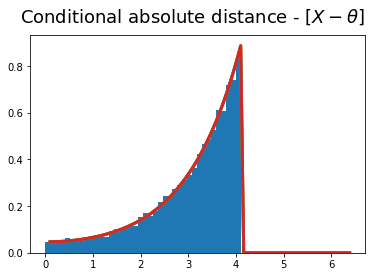

In [31]:
x = np.linspace(0.1,2*PI+0.1,100)

plt.hist(abs_dists, density=True, bins=40);

plt.plot(x, rng.pdf_conditional_absolute_distance(x, theta, lamb, 'rate'), linewidth=3)
plt.plot(x, rng.pdf_conditional_absolute_distance(x, theta, kapp, 'shape'), linewidth=3)
plt.plot(x, rng.pdf_conditional_absolute_distance(x, theta, beta, 'delay'), linewidth=3)

plt.suptitle(r"Conditional absolute distance - $[X-\theta]$", fontsize=18);

In [32]:
cdf_x = np.sort(abs_dists)
cdf_y = np.arange(N)/N

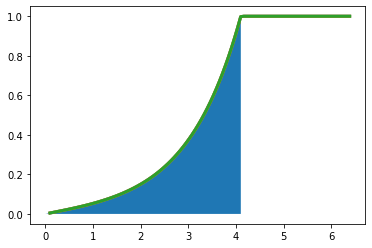

In [33]:
plt.fill_between(cdf_x, cdf_y, linewidth=3)
plt.plot(x, rng.cdf_conditional_absolute_distance(x, theta, lamb, 'rate'), linewidth=3)
plt.plot(x, rng.cdf_conditional_absolute_distance(x, theta, kapp, 'shape'), linewidth=3)
plt.plot(x, rng.cdf_conditional_absolute_distance(x, theta, beta, 'delay'), linewidth=3)

### Conditional circular distance

In [34]:
circ_dists = [min(dist, 2*PI-dist) for dist in abs_dists]

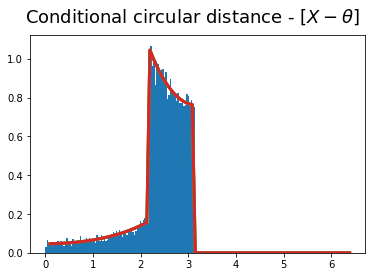

In [38]:
x = np.linspace(0.1,2*PI+0.1,100)

plt.hist(circ_dists, density=True, bins=100);

plt.plot(x, rng.pdf_conditional_circular_distance(x, theta, lamb, 'rate' ), linewidth=3)
plt.plot(x, rng.pdf_conditional_circular_distance(x, theta, kapp, 'shape'), linewidth=3)
plt.plot(x, rng.pdf_conditional_circular_distance(x, theta, beta, 'delay'), linewidth=3)

plt.suptitle(r"Conditional circular distance - $[X-\theta]$", fontsize=18);

In [36]:
cdf_x = np.sort(circ_dists)
cdf_y = np.arange(N)/N

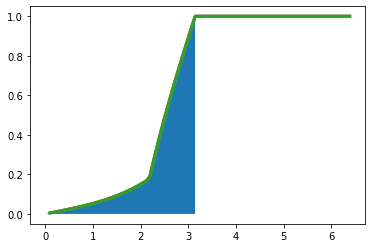

In [37]:
plt.fill_between(cdf_x, cdf_y, linewidth=3)
plt.plot(x, rng.cdf_conditional_circular_distance(x, theta, lamb, 'rate'), linewidth=3)
plt.plot(x, rng.cdf_conditional_circular_distance(x, theta, kapp, 'shape'), linewidth=3)
plt.plot(x, rng.cdf_conditional_circular_distance(x, theta, beta, 'delay'), linewidth=3)

In [41]:
theta

4.100830991355004

### Network

In [15]:
N = 2**12
rho = 0.05
mu_S = rng.mean_similarity(lamb, a=a)
rate = lamb

In [25]:
G = rng.network_model(N, rho, beta, a=0.5, return_positions=False)

In [15]:
nx.density(G)

0.050308231265262515

In [18]:
k = rng.slope(rho, lamb, a)

In [19]:
k

6.112149303264688

In [20]:
rho

0.05

In [21]:
assert rho > rng.mean_similarity(lamb, a=a), rng.mean_similarity(lamb, a=a)

In [22]:
k*quad(lambda t : t*rng.pdf_similarity(t, lamb, a=a), 0, 1/k)[0] + \
(1-rng.cdf_similarity(1/k, lamb, a=a))

0.04999999999999923

In [23]:
quad(lambda t : t*rng.pdf_similarity(t, lamb, a=a), 0, 1/k)[0]

0.0007116977771398157

In [64]:
2*a*PI * lamb / np.sinh(PI*lamb) * quad(lambda t : 
                                        t*np.cosh(PI*lamb * (1-2*a*(1-t))), 
                                        0, min(1/k,1))[0]

0.0007116977771398157

In [71]:
def slope_integral(rate, a, k):
    A = np.cosh((2*a-1) * PI * rate)
    B = np.cosh(PI*rate + 2*a*(1/k-1)*PI*rate)
    C = 2*a*PI*lamb*np.sinh(PI*rate + 2*a*(1/k-1)*PI*rate)/k
    
    numerator   = A-B+C
    denominator = (2*a*PI) * rate * np.sinh(PI*rate)
    return numerator / denominator

In [76]:
print(scipy.optimize.newton(
    func = lambda k: slope_integral(rate, a, k) + (1-rng.cdf_similarity(1/k, rate, a)) - rho,
    x0 = rho/mu_S))

11.693615313591526


In [77]:
k

6.112149303264688

In [85]:
mu_S = rng.mean_similarity(rate,a)
const = 1/np.sinh(PI*rate)

def integral(k): # This can probably be further simplified
    term1 = np.sinh((1 + 2*a*(1/k-1))*PI*rate)
    term2 = (k*np.sinh((a*PI*rate)/k)*np.sinh(((a+k-2*a*k)*PI*rate)/k))/(a*PI*rate)
    return term1-term2

print(scipy.optimize.newton(
    func = lambda k: const*(integral(k) + (1/const-np.sinh(rate*(PI-2*a*PI*(1-1/k))))) - rho,
    x0 = rho/mu_S))

6.112149303264961


In [52]:
mu_S = rng.mean_similarity(rate,a)

def k_to_rho(k): # This can probably be further simplified
    A = a*PI*rate
    B = PI*rate
    return 1 - k*np.sinh(A/k)*np.sinh(A/k + (B-2*A)) / (A*np.sinh(B))

print(scipy.optimize.newton(func = lambda k: k_to_rho(k) - rho, x0 = rho/mu_S))

6.112149303265188


In [69]:
mu_S = rng.mean_similarity(rate,a)
const = 1/np.sinh(PI*rate)

def integral(k): # This can probably be further simplified
    term1 = np.sinh((1 + 2*a*(1/k-1))*PI*rate)
    term2 = (k*np.sinh((a*PI*rate)/k)*np.sinh(((a+k-2*a*k)*PI*rate)/k))/(a*PI*rate)
    return term1-term2

print(scipy.optimize.newton(
    func = lambda k: const*integral(k) + (1-rng.cdf_similarity(1/k, rate, a)) - rho,
    x0 = rho/mu_S))

0.004350003072679767

In [70]:
const*integral(k)

0.004350003072680289

In [71]:
slope_integral(rate, a, k)

0.0007116977771437122

In [61]:
rate = lamb

term1 = np.sinh((1 + 2*a*(1/k-1))*PI*rate)
term2 = (k*np.sinh((a*PI*rate)/k)*np.sinh(((a+k-2*a*k)*PI*rate)/k))/(a*PI*rate)
term1-term2

0.03458644612948003

In [55]:
(np.cosh((2*a-1) * PI * lamb) - 
 np.cosh(PI*lamb + 2*a*(1/k-1)*PI*lamb) + 
 2*a*PI*lamb*np.sinh(PI*lamb + 2*a*(1/k-1)*PI*lamb)/k) / \
((2*a*PI) * lamb * np.sinh(PI*lamb))

0.0007116977771437122

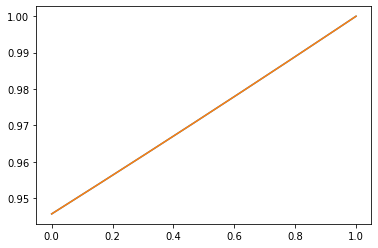

In [83]:
t = np.linspace(0,1, 200)

plt.plot(t, np.sinh(rate*(PI-2*a*PI*(1-t)))/np.sinh(rate*PI))
plt.plot(t, rng.cdf_similarity(t, theta=rate, a=a))

In [46]:
(np.cosh((2*a-1) * PI * lamb) - 
 np.cosh(PI*lamb + 2*a*(1/k-1)*PI*lamb) + 
 2*a*c*PI*lamb*np.sinh(PI*lamb + (2*a)*(1/k-1)*PI*lamb))/((2*a)**2 * (PI*lamb)**2)

0.10212808087268534

In [27]:
1/k

4.689569243318852

In [91]:
c = 2*PI*a

1 - (np.sinh(lamb*(PI-c)) / np.sinh(lamb*PI)) - \
1/(lamb*np.sinh(lamb*PI)*c) * (np.cosh(np.pi*lamb) - c*lamb*np.sinh(lamb*(np.pi-c)) - np.cosh(lamb*(np.pi-c)))

0.027417299558438666

In [95]:
mu_S = rng.mean_similarity(lamb,a)

scipy.optimize.newton(
            func = lambda k: 1 - np.sinh(lamb*(PI-c))/np.sinh(lamb*PI) - \
                             1/(lamb*np.sinh(lamb*PI)*c) * \
                             (np.cosh(np.pi*lamb) - c*lamb*np.sinh(lamb*(np.pi-c)) - np.cosh(lamb*(np.pi-c))) - rho/k,
            x0 = rho/mu_S)

1.823666108816712

In [96]:
k

6.112149303265226

In [97]:
rho/mu_S

1.8236661088167956

In [26]:
t = np.linspace(0,np.pi,200)

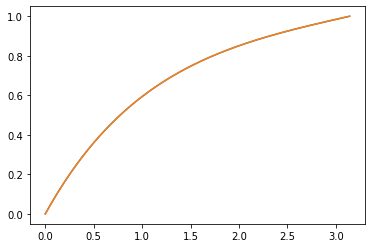

In [28]:
plt.plot(t, rng.cdf_circular_distance(t, lamb))
plt.plot(t, [quad(lambda tau:rng.pdf_circular_distance(tau, lamb), 0, ti)[0] for ti in t])

In [35]:
quad(lambda tau : tau*rng.pdf_circular_distance(tau, lamb), 0, 2*np.pi*a)[0]

0.45854588193670304

In [37]:
c = 2*np.pi*a

1/(lamb*np.sinh(lamb*np.pi)) * (np.cosh(np.pi*lamb) - c*lamb*np.sinh(lamb*(np.pi-c)) - np.cosh(lamb*(np.pi-c)))

0.45854588193670276